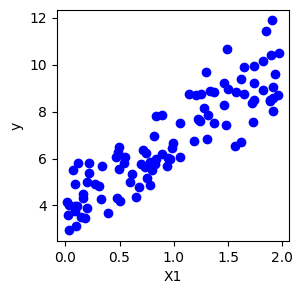

array([0.61904375])

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.figure(figsize=(3, 3))
plt.scatter(X, y, color = 'blue')
plt.xlabel('X1')
plt.ylabel('y')
plt.show()
X[0]

In [2]:
# ^θ is the value of θ that minimizes the cost function
#common to augment the feature matrix X by adding a column of ones, to account for intercept
#Normal Equation linear regression
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
X_b[0]

array([1.        , 0.61904375])

In [3]:
#θbest = (X^T X) ^-1X^Ty
#X^T X calculates the dot product of the transposed feature matrix with itself
#(X^T X)^-1 computes the inverse of the dot product (isolating θ on one side of the equation)
#X^T y is the dot product of the transposed feature matrix with the target vector y (contains the actual target labels)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) #θbest = (X^T X) ^-1X^Ty
theta_best #contains the optimal coefficients. Hoping for θ0 = 4 and θ1 = 3 but off due to noise

array([[3.83360661],
       [3.02404023]])

In [4]:
#make predictions for hat θ
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance. needed for intercept - representing the expected value of target variables when all independent variables are zero
y_predict = X_new_b.dot(theta_best) #multiply by coeffs
y_predict

array([[3.83360661],
       [9.88168707]])

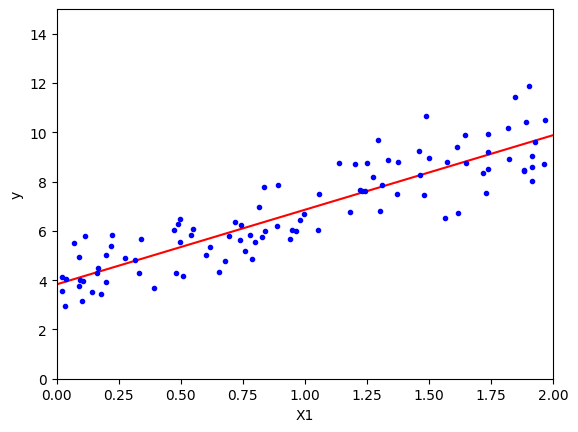

In [5]:
plt.plot(X_new, y_predict, 'r-')
plt.xlabel('X1')
plt.ylabel('y')
plt.axis([0, 2, 0, 15])
plt.plot(X, y, 'b.')

In [6]:
#linear reg function does the same thing..
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.83360661]), array([[3.02404023]]))

In [7]:
lin_reg.predict(X_new)

array([[3.83360661],
       [9.88168707]])

In [8]:
#LinReg() class is based on scipy.linalg.lstsq() func (least squares)
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)
theta_best_svd

array([[3.83360661],
       [3.02404023]])

In [9]:
#SVD linear reg
np.linalg.pinv(X_b).dot(y) # pseudoinverse of X

array([[3.83360661],
       [3.02404023]])

In [10]:
#deep-ml implementation
import numpy as np
def linear_regression_normal_equation(X: list[list[float]], y: list[float]) -> list[float]:
  #exclude intercept - model only fits relationship based on features provided
  X = np.array(X)
  y = np.array(y).reshape(-1, 1) # Ensure y is a 2D array (column vector)
  theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y) #(coefs)
  theta = np.round(theta, 4).tolist()
  return theta 

In [11]:
#normal equation and svd get slow when # of features grows large.. both are linear O(m).
#use gradient descent instead when there are large # of features - tweak params iteratively to reduce cost func.
#key hyperparam in GD is learning rate.
#ensure all features have a similar scale.. e.g. StandardScaler.
#calculate gradient of cost function and update params in opposite direction until convergence (when it meets 0).

In [12]:
#batch gradient descent
learning_rate = 0.1 
epochs = 1000 #iterate thru dataset 1000 times..
m = 1000 #number of data points

theta = np.random.randn(2, 1) #compute random coefs. going to iteratively adjust..
for _ in range(epochs):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradients 
theta

array([[3.82195068],
       [3.03396869]])

In [15]:
m, n = X.shape
coefs = np.zeros((100, 1))
coefs[0:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [16]:
#deep - ml batch GD implementation
import numpy as np
def linear_regression_gradient_descent(X: np.ndarray, y: np.ndarray, alpha: float, iterations: int) -> np.ndarray:
    m, n = X.shape #rows (# of training examples), cols (number of features for each training example)
    coefs = np.zeros((n, 100)) #initialize coefs to 0's
    learning_rate = alpha

    for _ in range(iterations):
        predictions = np.dot(X, coefs) #current model output given current coefs 
        errors = predictions - y.reshape(-1, 1) #diff between current model prediction and actual target value
        gradients = np.dot(X.T, errors) / m #how much each feature in X contributes to the prediction error. /m is used to avg out gradients for consistency.
        coefs = coefs - learning_rate * gradients #adjust coefs.

    return np.round(coefs, 4)

In [17]:
#stochastic GD
#model params are updated based on a single randomly selected data point - leads to high variance in the gradients 
#using learning rate decay - Decreasing the learning rate as iterations increase helps stabilize convergence by 
#allowing larger updates in the early stages of training to explore the loss landscape.
#As the model approaches the minimum, a smaller learning rate facilitates finer adjustments, 
#reducing the risk of overshooting and mitigating the impact of noisy gradient estimates

n_epochs = 50 
t0, t1 = 5, 50 #learning schedule hyperparams
m = 100 #number of samples
X_b = np.c_[np.ones((100, 1)), X] #padded with intercept of 1.

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m): #loop over number of samples
        random_index = np.random.randint(m) #randomly select index from samples
        xi = X_b[random_index:random_index + 1] #extract current feature for selected sample..
        yi = y[random_index:random_index + 1] #.. and corresponding target value
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi) #2 for MSE
        eta = learning_schedule(epoch * m + i) #reduce learning rate
        theta = theta - eta * gradients #compute coefs_
theta

array([[3.86393983],
       [3.03635177]])

In [18]:
#SGD Regressor 
from sklearn.linear_model import SGDRegressor 
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1) #max iter = epochs, #tolerance for stop criteria - if improve in loss function is less than 0.001, algorithm will stop. eta = intial learning rate
sgd_reg.fit(X, y.ravel()) #ravel - flatten 2d array to 1d array
sgd_reg.intercept_, sgd_reg.coef_

(array([3.81120268]), array([3.0192726]))

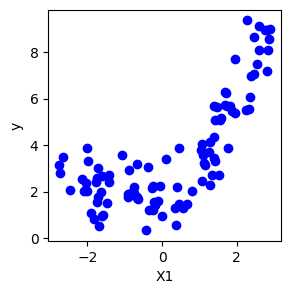

In [19]:
#Polynomial Regression 
m = 100
X = 6 * np.random.rand(m, 1) - 3 
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.figure(figsize=(3, 3))
plt.scatter(X, y, color = 'blue')
plt.xlabel('X1')
plt.ylabel('y')
plt.show() #noisy dataset, straight line will not fit

In [20]:
from sklearn.preprocessing import PolynomialFeatures 
poly_features = PolynomialFeatures(degree=2, include_bias = False) #adding square of each feature
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([1.46661298]), array([1.46661298, 2.15095363]))

In [21]:
#X_poly now contains the original feature of X plus the square of the feature 
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_ #create a curved linear regression line on the data.

(array([1.96001923]), array([[0.89238366, 0.52843589]]))

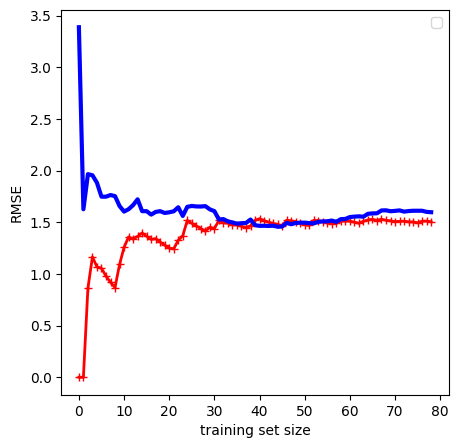

In [22]:
#generate learning curves to compare performance - underfitting vs overfitting.
#can use cross validation but learning curves are another method.

from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split 

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.figure(figsize=(5, 5))
    plt.xlabel('training set size')
    plt.ylabel('RMSE')
    plt.legend(['single element']) 
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)   #model is underfitting - rmse is plateauing. need better features or model.

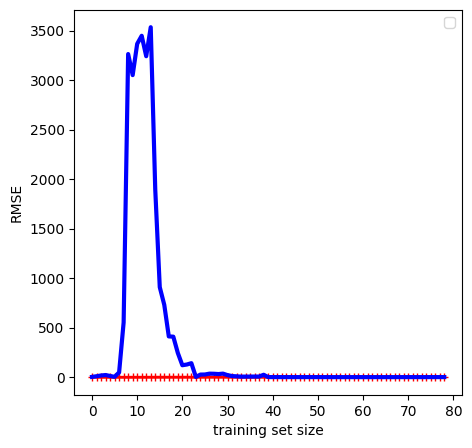

In [23]:
from sklearn.pipeline import Pipeline 

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)), 
    ('lin_reg', LinearRegression())
])
plot_learning_curves(polynomial_regression, X, y) #overfitting - model better on training data.

In [26]:
#ridge regression requires standard scaling 
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
ridge_reg = Ridge()
ridge_reg.fit(X_scaled, y)
prediction = ridge_reg.predict(scaler.transform([[1.5]]))
prediction

array([[4.97651804]])

In [27]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.98881153])

In [28]:
#Lasso Regression 
from sklearn.linear_model import Lasso 
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.94366791])

In [29]:
#elastic net - middle ground between lasso and ridge 
from sklearn.linear_model import ElasticNet 
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.94240433])

In [34]:
#Early Stopping
from sklearn.base import clone 
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import warnings 

warnings.filterwarnings('ignore')

# Create a pipeline for preprocessing the data
# - PolynomialFeatures will create polynomial features of degree 90 (or whatever degree is specified)
# - StandardScaler will standardize the features to have mean=0 and variance=1
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)), 
    ('std_scaler', StandardScaler())
])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# - max_iter=1 means we will fit the model one epoch at a time
# - tol=None disables early stopping based on tolerance
# - warm_start=True allows us to continue training from the previous state
# - penalty=None means no regularization is applied
# - learning_rate='constant' with eta0 set to 0.0005 defines the learning rate
sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True, penalty=None, learning_rate='constant', eta0=0.0005)

# Initialize variables to track the best validation error and corresponding model
minimum_val_error = float('inf')  # Start with infinity to find the minimum
best_epoch = None  # To store the epoch with the best validation error
best_model = None  # To store the model that achieved the best validation error 

# Training loop for a maximum of 1000 epochs
for epoch in range(1000):
    # Fit the model to the training data
    sgd_reg.fit(X_train_poly_scaled, y_train)
    coefficients = sgd_reg.coef_
    # Predict the validation set using the current model
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    
    # Calculate the mean squared error on the validation set
    val_error = mean_squared_error(y_val, y_val_predict)
    
    # Check if the current validation error is lower than the previously recorded minimum
    if val_error < minimum_val_error:
        minimum_val_error = val_error  # Update minimum validation error
        best_epoch = epoch  # Record the epoch number
        best_model = clone(sgd_reg)  # Clone the current model to store the best one

best_epoch #best validation error on 2nd epoch

54

In [35]:
from sklearn import datasets 
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

Text(0, 0.5, 'probability')

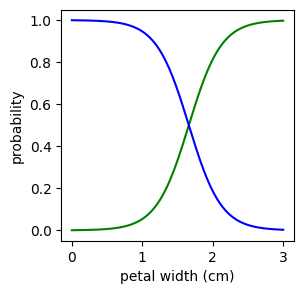

In [36]:
X = iris['data'][:, 3] #extracts all the values in the fourth column (petal width) for all flower samples.
X = X.reshape(-1, 1)
y = (iris['target'] == 2).astype(int) # 1 if Iris-Virginica, else 0

from sklearn.linear_model import LogisticRegression 
log_reg = LogisticRegression()
log_reg.fit(X, y)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1) #1000 evenly spaced values between 0 and 3. petal widths
y_proba = log_reg.predict_proba(X_new) #probability of each value in X_new being iris or not
plt.figure(figsize = (3, 3))
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris')
plt.plot(X_new, y_proba[:, 0], 'b-', label = 'Not Iris')
plt.xlabel('petal width (cm)')
plt.ylabel("probability") 
#as petal width increases, probability of being iris increases.

In [37]:
#decision boundary above at 1.6 cm where both probabilities are equal to 50%.
#if the petal width is higher than 1.6 cm, the classifier will predict that 
#the flower is an Iris, or else it will predict that it is not (even if it is not very confident)
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [38]:
X = iris["data"][:, (2, 3)]  # Extracts petal length and petal width features.
y = iris["target"]            # The target variable, which contains the class labels.

# Initialize the softmax regression model
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10) #multinomial = softmax

# Fit the model on the training data
softmax_reg.fit(X, y)
softmax_reg.predict([[5, 2]])

array([2])

In [39]:
softmax_reg.predict_proba([[5, 2]]) #90 percent proba of belonging to class 2

array([[6.21626373e-07, 5.73689802e-02, 9.42630398e-01]])

In [40]:
import math 
#eulers
print(math.e)

2.718281828459045


In [42]:
#logistic regression from scratch
from sklearn.model_selection import train_test_split 
from sklearn import datasets 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt 

class LogisticRegression:
    def __init__(self, learning_rate=0.0001, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs 
        self.coefs = None 
        self.bias = None 
        self.losses = []
        self.accuracies = []

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    #y_true - true labels 
    #y_pred - sigmoided outputs from model
    def compute_loss(self, y_true, y_pred):
        #binary cross entropy 
        epsilon = 1e-9 #constant 
        y1 = y_true * np.log(y_pred + epsilon)
        y2 = (1-y_true) * np.log(1 - y_pred + epsilon)
        return -np.mean(y1 + y2)

    #gradient descent 
    def fit(self, X, y):
        n_samples, n_features = X.shape 
        self.coefs = np.zeros(n_features)
        self.bias = 0 #no constant 

        for _ in range(self.epochs):
            preds = self.sigmoid(np.dot(X, self.coefs) + self.bias)
            loss = self.compute_loss(y, preds)
            self.losses.append(loss)
            
            errors = preds - y
            gradients = np.dot(X.T, errors) / n_samples 
            self.coefs = self.coefs - self.learning_rate * gradients 
            self.bias = self.bias - self.learning_rate * np.mean(errors)

    def predict(self, X):
        threshold = .5
        y_hat = np.dot(X, self.coefs) + self.bias 
        y_predicted = self.sigmoid(y_hat)
        y_predicted_class = [1 if i > threshold else 0 for i in y_predicted] #binary classification - 0 or 1
        return y_predicted_class


if __name__ == "__main__":
    dataset = datasets.load_breast_cancer()
    X, y = dataset.data, dataset.target 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    regressor = LogisticRegression(learning_rate=0.0001, epochs=1000)
    regressor.fit(X_train, y_train)
    predictions = regressor.predict(X_test)
    accuracy = np.mean(predictions == y_test)
    cm = confusion_matrix(y_test, predictions)
    print(cm)

    print("Accuracy:", accuracy)
    print("Losses over epochs:", regressor.losses[0:5])


[[43  0]
 [57 14]]
Accuracy: 0.5
Losses over epochs: [0.6931471785599452, 4.019396431047064, 7.697027643941751, 11.018425000979683, 7.5124471942042685]
